# Sensitivity analysis to cost models
Water demands can be met by numerous sources of water. AWASH performs the allocation of water by solving an optimization problem resulting in the least costly solution to meet water demands under the environmental constraints. In this notebook, we conduct a sensitivity analysis to the choice of cost model for water. 


## Impact on optimize-surface
Surface water use estimates are generally known at facility-, municipality- or county-level (e.g. USGS). To relate these numbers to the surface water network, an optimization problem is solved to determine the withdrawals at each canals linking nodes of the network (gauges) to the counties. As water in the network may be insufficient to meet demands, the model quantifies this failure by considering a super source. 

Two models are considered here: 1. cost is uniform, 2. cost is proportional to the relative elevation of the point of source and point of use (meaning if the gauge is at a lower altitude than the county, pumping costs are proportional to the elevation difference, if it is higher, cost is null).

In [1]:
cd("../../src/");
include("nui.jl");
include("lib/readconfig.jl");
config = readconfig("../configs/standard-1year.yml")
# setting extraction cost to 0 (option 1: cost is uniform)
config["watercost-extraction"] = false;
include("optimize-surface.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw1 = getdata(:Allocation, :swsupply);
swc1 = getdata(:WaterCost, :swcost);
supw1 = getdata(:Allocation, :supersourcesupply);

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.



Loading from saved region network...


  likely near /home/laureline/.julia/v0.4/Graphs/src/common.jl:3
  likely near /home/laureline/.julia/v0.4/Graphs/src/dot.jl:80


Loading from saved water network...
Optimize a model with 68238 rows, 106088 columns and 3732956 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e+01, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 1e+14]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 17537 rows and 10456 columns
Presolve time: 1.89s
Presolved: 50701 rows, 95632 columns, 2338055 nonzeros

Ordering time: 0.30s

Barrier statistics:
 AA' NZ     : 1.517e+06
 Factor NZ  : 2.406e+06 (roughly 80 MBytes of memory)
 Factor Ops : 2.101e+08 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 3.01 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 17714 iterations and 3.20 seconds
Optimal objective  5.916312783e+13
  5.598159 seconds (3.84 M allocations: 292.067 MB, 1.40% gc time)
supersourcesupply
[3158.4676981989687,847.6633508006535,3

Creating model...


Running model...


Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01403535
Missing usgs.01396580
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing usgs.09277800
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02248600
Missing canal.02280500
Missing canal.02280500
Missing canal.02280500
Missing canal.08437600
Missing canal.09475501
Missing canal.09475501
Missing canal.09522703
Missing canal.10170700
Missing canal.09475501
Missing canal.09522703
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs

In [2]:
# setting extraction cost proportional to relative elevation (option 2)
config["watercost-extraction"] = true;
include("optimize-surface.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw2 = getdata(:Allocation, :swsupply);
swc2 = getdata(:WaterCost, :swcost);
supw2 = getdata(:Allocation, :supersourcesupply);

Loading from saved region network...
Loading from saved water network...


Loading extraction cost from saved data...


Optimize a model with 68238 rows, 106088 columns and 3732956 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e+01, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 1e+14]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 17797 rows and 12345 columns
Presolve time: 1.58s
Presolved: 50441 rows, 93743 columns, 2311371 nonzeros

Ordering time: 0.34s

Barrier statistics:
 AA' NZ     : 1.514e+06
 Factor NZ  : 2.401e+06 (roughly 80 MBytes of memory)
 Factor Ops : 2.100e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.30567467e+19 -1.09709408e+21  2.69e+12 3.34e+05  8.88e+15     3s

Barrier performed 0 iterations in 3.24 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 28702 iterations and 3.45 se

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...


Loading extraction cost from saved data...


Running model...


Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.02280500
Missing usgs.11063000
Missing canal.09475501
Missing canal.09475501
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01403535
Missing usgs.01396580
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.034

In [3]:
# comparison with usgs estimates - loading the data
recorded = readtable(datapath("extraction/USGS-2010.csv"));
swusgs = recorded[:, :TO_SW] * 1383. / 12 *config["timestep"] * numsteps;

In [4]:
# verifying that demands are met
include("mapping.jl")
println("Total differences between USGS and model case 1: ", sum(abs(swusgs.data -sum(sw1+supw1,2))), " 1000m3")
println("Total differences between USGS and model case 2: ", sum(abs(swusgs.data -sum(sw2+supw2,2))), " 1000m3")
#mapdatacty(swusgs.data -sum(sw2+supw2,2), true)

Total differences between USGS and model case 1: 2.1855452558838806e-8 1000m3
Total differences between USGS and model case 2: 2.3404194138265666e-8 1000m3


### Comparison of the results


-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/home/laureline/anaconda2/lib/R/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: foreign


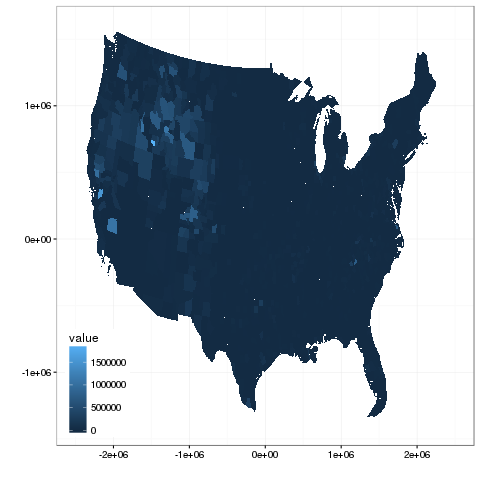

RCall.RObject{RCall.VecSxp}


In [5]:
# Reliance supersource option 1
mapdatacty(sum(supw1,2))

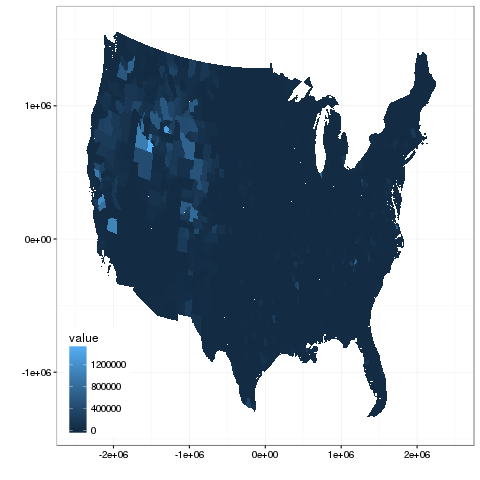

RCall.RObject{RCall.VecSxp}


In [6]:
# Reliance supersource option 2
mapdatacty(sum(supw2,2))

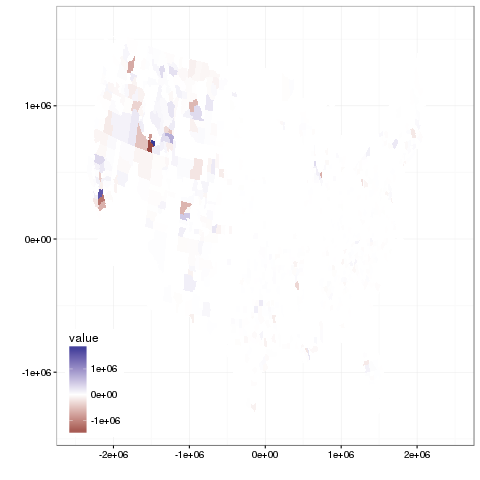

RCall.RObject{RCall.VecSxp}


In [7]:
# Comparison of reliance on supersource between option 1 and 2
mapdatacty(sum(supw1-supw2,2),true)

Counties in red face more failure when extraction costs are taken in consideration. 

From this last map, it seems that the cost model only impacts redistribution of failure among adjacent counties, it does not seem to have effect at a larger scale. However, if we look at the same data but in percentage to total demand:

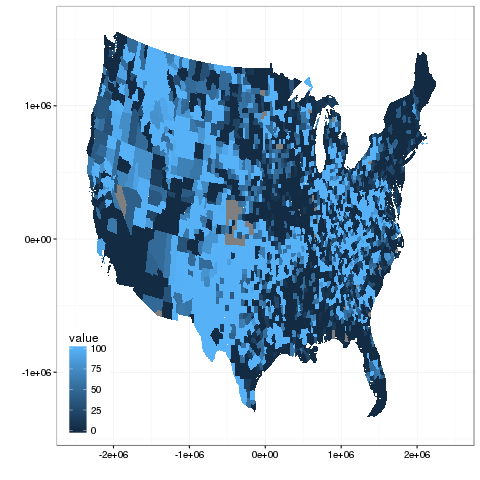

RCall.RObject{RCall.VecSxp}


In [8]:
# Percentage of failure option 1
mapdatacty(sum(supw1,2)./sum(sw1+supw1,2)*100)

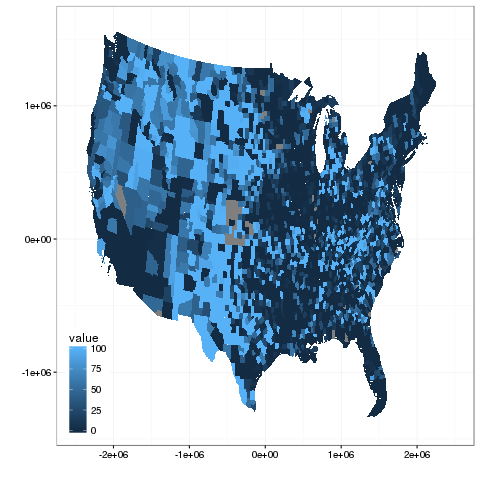

RCall.RObject{RCall.VecSxp}


In [9]:
# Percentage of failure option 2
mapdatacty(sum(supw2,2)./sum(sw2+supw2,2)*100)

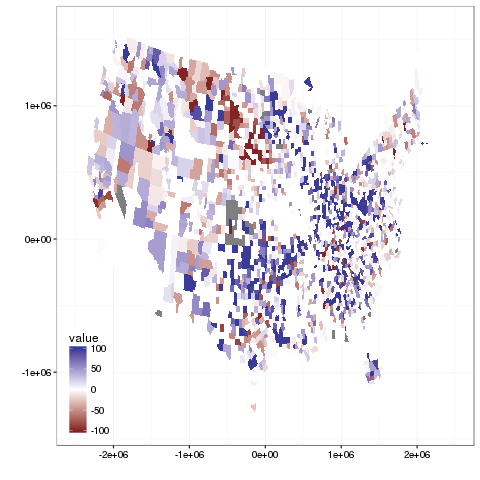

RCall.RObject{RCall.VecSxp}


In [10]:
# Percentage of failure option 2
mapdatacty((sum(supw1,2)-sum(supw2,2))./sum(sw2+supw2,2)*100, true)

We see that when we do not consider extraction cost, more counties are facing 100% failure than when we do consider extraction cost. The comparison of the histograms of the percentage of failure plotted hereafter show that it is reduced by a third and that those counties do not face any failure in case 2.

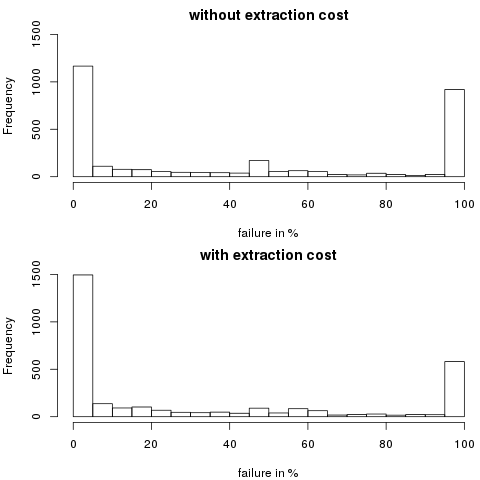

In [11]:
R"par(mfrow=c(2,1))"
R"par(mar=c(4,4,2,0))"
f1prct = sum(supw1,2)./sum(sw1+supw1,2)*100
f2prct = sum(supw2,2)./sum(sw2+supw2,2)*100
R"hist($f1prct, xlab='failure in %', main='without extraction cost',breaks=20,ylim=c(0,1500))";
R"hist($f2prct, xlab='failure in %', main='with extraction cost',breaks=20,ylim=c(0,1500))";

Hereafter, we investigate how this depends on the quantity of demanded water.

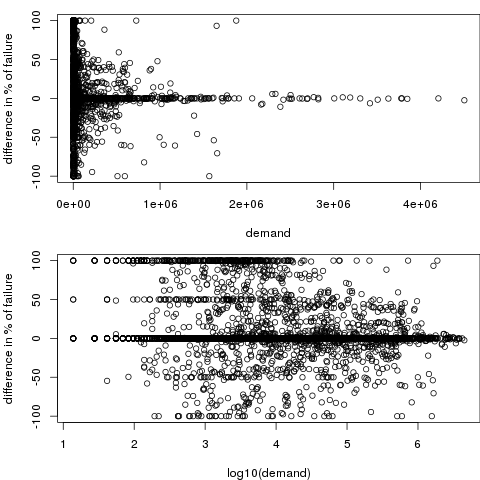

In [12]:
R"par(mfrow=c(2,1))"
R"par(mar=c(4,4,1,0))"
x = swusgs;
R"plot($x,$f1prct-$f2prct, xlab = 'demand', ylab = 'difference in % of failure')";
x = log10(swusgs);
R"plot($x,$f1prct-$f2prct, xlab = 'log10(demand)', ylab = 'difference in % of failure')";

The very large users (> 1e9 m3/year) seem to face very limited failure. I do not believe it is possible to conclude anything else. 

##### Cost of water
The last aspect is the cost of water. We plot hereafter the cost per 1000m3 of water to understand where it was not possible to withdraw water without pumping water uphill

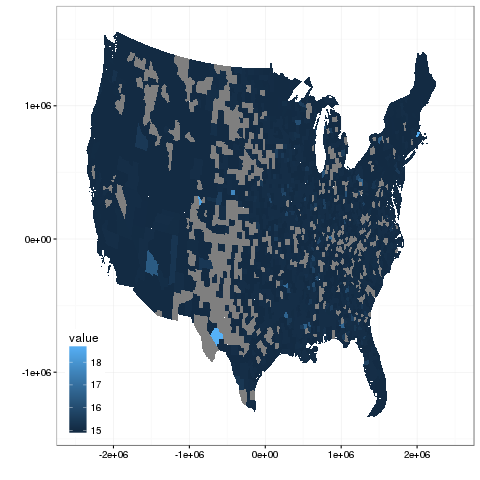

RCall.RObject{RCall.VecSxp}


In [13]:
# Surface water extraction cost per 1000m3
mapdatacty(sum(swc2,2)./sum(sw2,2))

One should note that these results were obtained using the current information in the model. At several locations, elevation information is missing. The extent of the impact it has on the optimization is unknown.